In [1]:
from sklearn.datasets import fetch_openml
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import pandas as pd
import numpy as np

In [ ]:
mnist = fetch_openml('mnist_784')

In [279]:
# test Data to be used
# x_train
x_testData = mnist.data[:30000]

In [280]:
# validation 
trainingData = mnist.data[30001:51001] # x_train x_validation x_test 
# list of predictions  predictions = [....] 
y_validation = mnist.target[30001:51001] # y_train y_valid y_test


In [281]:
# Target Labels [0-9]
# y_train
y_labelData = mnist.target[:30000] 


In [282]:
distance = euclidean_distances(x_testData, trainingData)
sorted_distance = np.argsort(distance, axis=1) # set axis=1 to specify sorting distances along the rows

test_img_index = 0 # set a random index to see the distance from 1 test img to the others
distance[test_img_index] # represents the dist from a specific test img to all other training images
sorted_distance[test_img_index] # represents the index of the training images that are closest to the test img based on distances

array([ 2247,   482, 12337, ...,  7073, 13451, 11357])

In [283]:
def KNN(x, y, dist, k):
  num_test = len(dist)
  predicted_labels = []
  for i in range(num_test):
    neighbors = dist[i, :k] 
    labels = y[neighbors]
    # print("Labels | Predictions \n",labels)
    p = predict(labels,k)
    # print("prediction:" ,p)
    predicted_labels.append(p)
  return predicted_labels

def predict(nLabels, k):
    unique_labels, counts = np.unique(nLabels, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]  
    return majority_label

In [311]:
k = 500
modValue = 10
kNearestNeighbor = KNN(x_testData, y_labelData, sorted_distance, k)

In [312]:
# predict
def get_accuracy(x, y, test_size=0.2, k=k, random_state=42):
    accuracy = []
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=test_size, random_state=random_state)
    for i in range(1, k + 1):
        if i % modValue == 0:
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            accuracy_score_val = accuracy_score(y_val, y_pred)
            accuracy.append(accuracy_score_val)
    return accuracy

In [314]:
# graph for plotting accuracy vs k value (as well as the highest K value)
def plot_accuracy(accuracy):
    k_values = range(1, len(accuracy) + 1) 

    max_index = accuracy.index(max(accuracy))
    plt.plot(k_values, accuracy, marker='o', label='Accuracy')  
    plt.plot(max_index + 1, accuracy[max_index], marker='X', markersize=10, color='red', linestyle='None', label='Highest Accuracy')  # plot a marker at the highest accuracy value

    plt.xlabel('K Value')  
    plt.ylabel('Accuracy')  
    plt.title('Accuracy vs. K Value')  
    plt.legend()  
    plt.show()  

In [315]:
accuracyV = get_accuracy(x_testData, y_labelData)

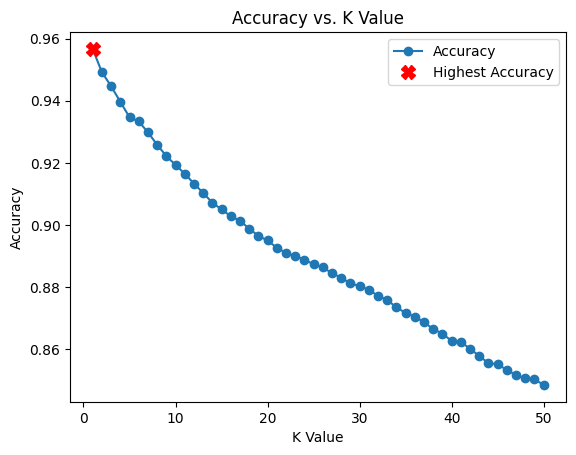

In [316]:
# plot accuracy graph
plot_accuracy(accuracyV)

This chart showcases the value of K as it grows & the accuracy rating.

* As K gets larger --> variance falls off
* As K gets smaller --> higher variance

In KNN, we look for the "best" K-Value based upon the lowest error margin between the x_train and validation data.

In [317]:
# first = labels, k
# second = predicted_labels, Accuracy

def write_output_to_file(output_file, k, firstColumn, secondColumn):
    with open(output_file, 'w') as file:
        if len(firstColumn) > 0:
            file.write("Label | Prediction \n")
            file.write("|:-- |:-- |\n")
            for i in range(len(secondColumn)):
                if i > 50:
                    break
                file.write(f" {firstColumn[i]} | {secondColumn[i]} \n")
        else:
            file.write("K | Accuracy %\n")
            file.write("|:-- |:-- |\n")
            for i in range(len(secondColumn)):
                file.write(f" {i * modValue} | {secondColumn[i]:.4f} \n")

In [319]:
# Write to File:
write_output_to_file("KvsAccuracy.txt", k, [], accuracyV)
write_output_to_file("predictions.txt", k, y_labelData, kNearestNeighbor)